In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('loan_data.csv')

In [4]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


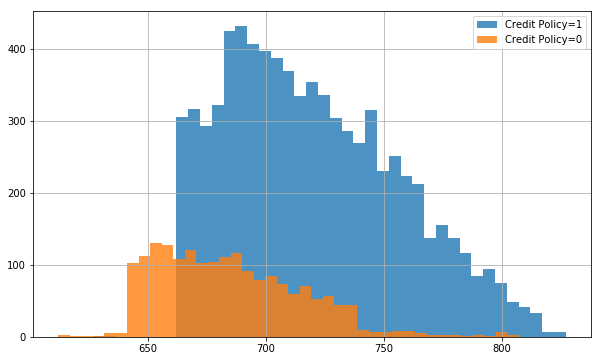

In [15]:
data[data['credit.policy']==1]['fico'].hist(bins=40,figsize=(10,6),label='Credit Policy=1',alpha=0.8)
data[data['credit.policy']==0]['fico'].hist(bins=40,figsize=(10,6),label='Credit Policy=0',alpha=0.8)
plt.legend()

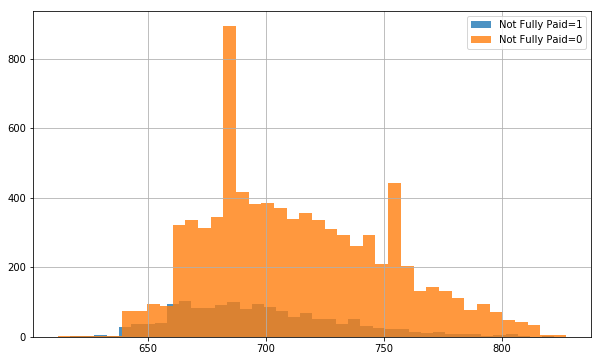

In [16]:
data[data['not.fully.paid']==1]['fico'].hist(bins=40,figsize=(10,6),label='Not Fully Paid=1',alpha=0.8)
data[data['not.fully.paid']==0]['fico'].hist(bins=40,figsize=(10,6),label='Not Fully Paid=0',alpha=0.8)
plt.legend()

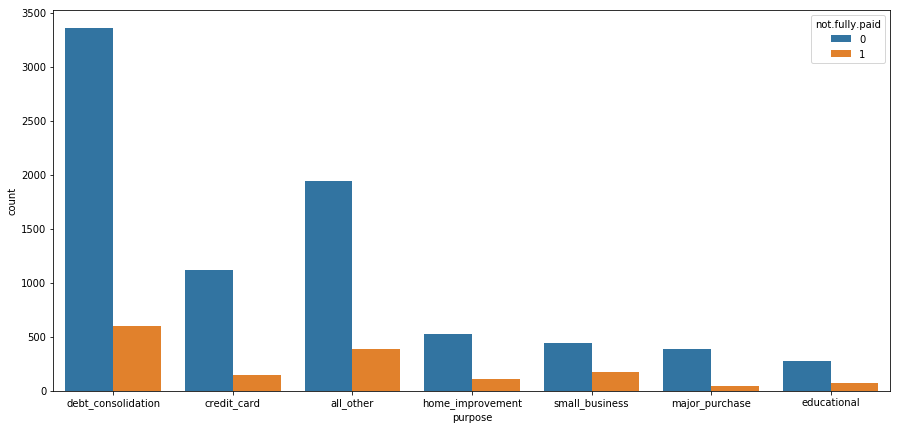

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x='purpose',hue='not.fully.paid',data = data)

/Users/maheshjindal/miniconda3/envs/pythonapps/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


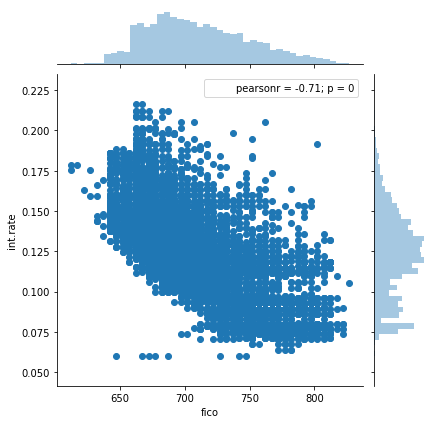

In [26]:
sns.jointplot(x='fico',y='int.rate',data=data)

<Figure size 1440x576 with 0 Axes>

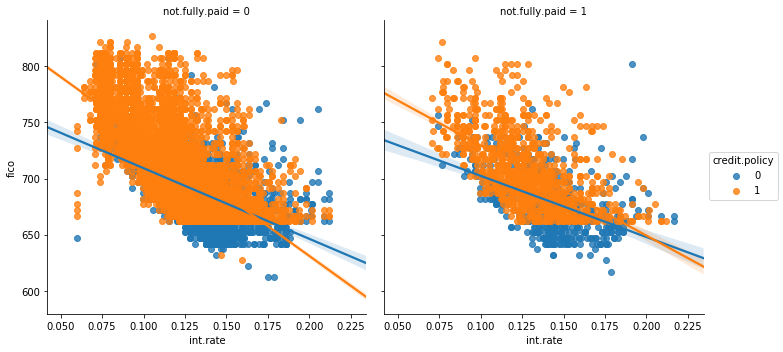

In [31]:
plt.figure(figsize=(20,8))
sns.lmplot(x='int.rate',y='fico',data=data,hue='credit.policy',col='not.fully.paid')

In [32]:
labelEncodingfeatures = ['purpose']


In [34]:
all_data = pd.get_dummies(data,columns=labelEncodingfeatures,drop_first=True)

In [35]:
all_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0,1,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,0,0,0,0,0,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,0,0,0,1,0,0
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,0,1,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
X = all_data.drop('not.fully.paid',axis=1)
y = all_data['not.fully.paid']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dTreeclf = DecisionTreeClassifier()

In [41]:
dTreeclf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
predictions = dTreeclf.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.82      0.83      2666
          1       0.17      0.20      0.18       495

avg / total       0.74      0.72      0.73      3161



In [45]:
print(confusion_matrix(y_test,predictions))

[[2176  490]
 [ 395  100]]


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
randomfc = RandomForestClassifier(n_estimators=300)

In [50]:
randomfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
pred = randomfc.predict(X_test)

In [52]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.91      2666
          1       0.50      0.02      0.04       495

avg / total       0.79      0.84      0.78      3161



In [53]:
print(confusion_matrix(y_test,pred))

[[2656   10]
 [ 485   10]]
